In [1]:
#подключаем библиотеки
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [2]:
#Загружаем датасет
df = pd.read_csv('data_halabus/reuters-allcats.csv')

In [3]:
df.head()

,class,text
0,Neg-,2 BAHIA COCOA REVIEW SALVADOR Feb 26 - Sh...
1,Neg-,2 USX ltX DEBT DOWGRADED BY MOODYS NEW YOR...
2,Pos-earn,2 COBANCO INC ltCBCO YEAR NET SANTA CRUZ ...
3,Pos-earn,2 BROWN-FORMAN INC ltBFD 4TH QTR NET LOUIS...
4,Neg-,2 HUGHES CAPITAL UNIT SIGNS PACT WITH BEAR STE...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 2 columns):
class    4079 non-null object
text     4079 non-null object
dtypes: object(2)
memory usage: 63.9+ KB


In [5]:
df.describe()

,class,text
count,4079,4079
unique,7,4067
top,Neg-,2 HYDRO QUEBEC ISSUES CANADIAN DLR BOND LO...
freq,1929,2


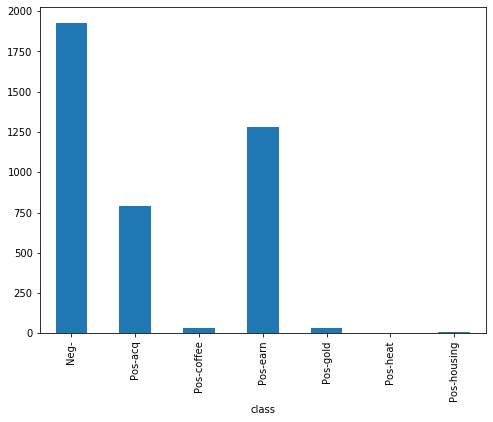

In [6]:
#видим, что данные распределены не равномерно 
fig  = plt.figure(figsize = (8, 6))
df.groupby('class')['text'].count().plot.bar(ylim = 0)
plt.show()

In [7]:
#пример новости из выборки
df['text'][10]

'2 BRAZIL ANTI-INFLATION PLAN LIMPS TO ANNIVERSARY     RIO DE JANEIRO  Feb 26 - Brazils Cruzado anti- inflation plan  initially hailed at home and abroad as the saviour of the economy  is limping towards its first anniversary amid soaring prices  widespread shortages and a foreign payments crisis     Announced last February 28 the plan froze prices  fixed the value of the new Cruzado currency and ended widespread indexation of the economy in a bid to halt the countrys 250 pct inflation rate     But within a year the plan has all but collapsed     The situation now is worse than it was Although there was inflation  at least the economy worked  a leading bank economist said     The crumbling of the plan has been accompanied by a dramatic reversal in the foreign trade account In 1984 and 1985 Brazils annual trade surpluses had been sufficient to cover the 12 billion dlrs needed to service its 109 billion dlr foreign debt     For the first nine months of 1986 all seemed to be on target for

In [8]:
#разделяем датасет на учебную и тестовые выборки, я разделял просто на две части,
#не учитывая неравномерности распределения классов. Это было сделанно для наглядности.
y_train =df['class'][:3400]
text_train = df.drop('class', axis = 1)[:3400]
y_test  = df['class'][3400:]
text_test = df.drop('class', axis = 1)[3400:]
y_train.shape, text_train.shape, y_test.shape, text_test.shape

((3400,), (3400, 1), (679,), (679, 1))

In [9]:
corpus = ['This is the first document.','This document is the second document.',
          'And this is the third one.','Is this the first document?']
text_test['text']

3400    2 FOOTHILL GROUP ltFGI COMPLETES DEBT PLACEMEN...
3401    2 ltGEN TERM CORP ACQUIRES PRIVATE FIRM     SA...
3402    2 US CORN EXPORTS SEEN WELL AHEAD OF LAST YEAR...
3403    2 GANDER ltGNDRO BUYS WESTERN WEAR RETAILER   ...
3404    2 WELLS FARGO AND CO 1ST QTR SHR 136 DLRS VS 1...
                              ...                        
4074    2 CABLE AND WIRELESS DETAILS MERGER OF HK UNIT...
4075    2 CABLE AND WIRELESS TO MERGE TWO HK UNITS INT...
4076    2 UGANDA PLANS TO EXPORT ROASTED COFFEE TO EUR...
4077    2 NZS CHASE CORP MAKES OFFER FOR ENTREGROWTH  ...
4078    2 SOVIET INDUSTRIAL GROWTHTRADE SLOWER IN 1987...
Name: text, Length: 679, dtype: object

In [10]:
#токенизируем наши новости, получаем векторы длинны 21950 элементв
cv = CountVectorizer()
cv.fit(text_train['text'])

print(len(cv.get_feature_names()))

21950


In [11]:
X_train = cv.transform(text_train['text'])
X_test = cv.transform(text_test['text'])

In [12]:
X_train.shape

(3400, 21950)

In [13]:
# Обучаем логистическую модель, скармливая ей учебную выборку
%%time 
logit = LogisticRegression(n_jobs=-1, random_state=7)
logit.fit(X_train, y_train)
print(round(logit.score(X_train, y_train), 3))

1.0
CPU times: user 1.68 s, sys: 236 ms, total: 1.92 s
Wall time: 987 ms


In [14]:
example = df['text'][3659]
print('example: {}'.format(example))
print ('class: {}'.format(df[df['text'] == example]['class'].values))

example: 2 AG EDWARDS INC ltAGE 1ST QTR MAY 31 NET     ST LOUIS  June 18 -     Shr 52 cts vs 62 cts     Net 10 884 000 vs 12 891 000     Revs 1333 mln vs 1288 mln     Avg shrs 21 017 000 vs 20 845 000  Reuter 3
class: ['Pos-earn']


In [15]:
logit.predict(cv.transform([example]))

array(['Pos-earn'], dtype=object)

In [16]:
logit_pred = logit.predict(X_test)

In [17]:
#Проверяем модель на тестовай выборке, в качестве оценки служит числовая характеристика,
#равная доле верных ответов
from sklearn.metrics import accuracy_score
accuracy_score(y_test, logit_pred)

0.9587628865979382

In [17]:
#Проверяем модель на тестовай выборке, в качестве оценки служит числовая характеристика,
#равная доле верных ответов
from sklearn.metrics import accuracy_score
accuracy_score(y_test, logit_pred)

0.9587628865979382